# Wrange and Analyze Data Project

In [29]:
import requests
import os
import pandas as pd
import json
import numpy as np
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
%matplotlib inline

## Section One: Gather Data

### Get WeRateDogs Twitter archive.

In [30]:
weratedogs_df = pd.read_csv('twitter-archive-enhanced.csv')

In [31]:
weratedogs_df.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
406,823719002937630720,NaN,NaN,2017-01-24 02:28:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Balto. He's very conten...,7.840579e+17,4.196984e+09,2016-10-06 15:49:14 +0000,"https://vine.co/v/5gKxeUpuKEr,https://vine.co/...",12,10,Balto,None,None,None,None
835,768193404517830656,NaN,NaN,2016-08-23 21:09:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gerald. He's a fairly exotic doggo. Floof...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768193404...,8,10,Gerald,doggo,None,None,None
1149,726828223124897792,NaN,NaN,2016-05-01 17:38:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bloop. He's a Phoenician Winnebago. To...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/726828223...,12,10,Bloop,None,None,None,None
858,763837565564780549,NaN,NaN,2016-08-11 20:40:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. He's touching a butt. Couldn't ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/763837565...,11,10,Alfie,None,None,None,None
1200,716730379797970944,NaN,NaN,2016-04-03 20:53:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",There has clearly been a mistake. Pup did noth...,NaN,NaN,NaN,https://twitter.com/chpsanfrancisco/status/716...,12,10,None,None,None,None,None
398,825026590719483904,NaN,NaN,2017-01-27 17:04:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Pablo. He's one gorgeous puppo. A...,NaN,NaN,NaN,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,None,None,None,puppo
781,775729183532220416,NaN,NaN,2016-09-13 16:13:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This girl straight up rejected a guy because h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775729183...,13,10,None,None,None,None,None
1773,678255464182861824,NaN,NaN,2015-12-19 16:47:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jessifer. She is a Bismoth Teriyaki. F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678255464...,9,10,Jessifer,None,None,None,None
2292,667160273090932737,NaN,NaN,2015-11-19 01:59:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bradlay. He is a Ronaldinho Matsuyama ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667160273...,11,10,Bradlay,None,None,None,None
2159,669571471778410496,NaN,NaN,2015-11-25 17:40:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keith. He's had 13 DUIs. 7/10 that's t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669571471...,7,10,Keith,None,None,None,None


### Get Tweet image predictions

In [32]:
folder_name = "image-predictions"

if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [33]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open(os.path.join(folder_name,url.split('/')[-1]), mode = "wb") as file:
    file.write(response.content)

In [34]:
image_df = pd.read_csv("image-predictions/image-predictions.tsv", sep='\t')

In [35]:
image_df.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1188,739544079319588864,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
2033,883482846933004288,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
70,667192066997374976,https://pbs.twimg.com/media/CUJXpRBXIAAN0yz.jpg,1,Rottweiler,0.283640,True,miniature_pinscher,0.148112,True,black-and-tan_coonhound,0.095585,True
1046,713175907180089344,https://pbs.twimg.com/media/CeW1tERWAAAA9Q2.jpg,1,timber_wolf,0.503788,False,malamute,0.430624,True,Siberian_husky,0.028454,True
549,677530072887205888,https://pbs.twimg.com/media/CWcSAI-WUAAOB9W.jpg,1,Staffordshire_bullterrier,0.689259,True,Norwegian_elkhound,0.026121,True,American_Staffordshire_terrier,0.023075,True
1513,786595970293370880,https://pbs.twimg.com/media/CuqM0fVWAAAboKR.jpg,1,Pembroke,0.709512,True,Cardigan,0.287178,True,chow,0.000570,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
1319,756275833623502848,https://pbs.twimg.com/media/Cn7U2xlW8AI9Pqp.jpg,1,Airedale,0.602957,True,Irish_terrier,0.086981,True,bloodhound,0.086276,True
284,671141549288370177,https://pbs.twimg.com/media/CVBfrU9WUAApDeV.jpg,1,guinea_pig,0.387728,False,wood_rabbit,0.171681,False,borzoi,0.075358,True
1242,747204161125646336,https://pbs.twimg.com/media/Cl6aOBhWEAALuti.jpg,2,coil,0.533699,False,dugong,0.087959,False,rain_barrel,0.039221,False


### Query the Twitter API

Read tweet_json.txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [36]:
api_data = []
tweet_file = open('tweet-json.txt', "r")

for line in tweet_file:
    tweet = json.loads(line)
    
    api_data.append({'id': tweet['id'],
                        'retweet_count': tweet['retweet_count'],
                        'favorite_count': tweet['favorite_count']})

In [37]:
# check script above
api_data

[{'id': 892420643555336193, 'retweet_count': 8853, 'favorite_count': 39467},
 {'id': 892177421306343426, 'retweet_count': 6514, 'favorite_count': 33819},
 {'id': 891815181378084864, 'retweet_count': 4328, 'favorite_count': 25461},
 {'id': 891689557279858688, 'retweet_count': 8964, 'favorite_count': 42908},
 {'id': 891327558926688256, 'retweet_count': 9774, 'favorite_count': 41048},
 {'id': 891087950875897856, 'retweet_count': 3261, 'favorite_count': 20562},
 {'id': 890971913173991426, 'retweet_count': 2158, 'favorite_count': 12041},
 {'id': 890729181411237888, 'retweet_count': 16716, 'favorite_count': 56848},
 {'id': 890609185150312448, 'retweet_count': 4429, 'favorite_count': 28226},
 {'id': 890240255349198849, 'retweet_count': 7711, 'favorite_count': 32467},
 {'id': 890006608113172480, 'retweet_count': 7624, 'favorite_count': 31166},
 {'id': 889880896479866881, 'retweet_count': 5156, 'favorite_count': 28268},
 {'id': 889665388333682689, 'retweet_count': 8538, 'favorite_count': 38818}

In [38]:
api_df = pd.DataFrame(api_data, columns = ['id','retweet_count','favorite_count'])

In [39]:
api_df.sample(50)

,id,retweet_count,favorite_count
630,794205286408003585,3895,10314
133,866686824827068416,3727,20070
1606,685641971164143616,885,3218
1071,739932936087216128,1217,4443
755,778650543019483137,1729,6430
2320,666430724426358785,204,330
730,781655249211752448,1314,4466
290,838085839343206401,0,150
643,793180763617361921,2310,7740
1311,706904523814649856,8830,15961


## Section Two: Assessing Data

Assess each dataframe visually and programmatically for quality and tidiness issues

### Visually inspect each table

In [40]:
# Display weratedogs table
weratedogs_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [41]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [42]:
api_df

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


### Programmatically Assess Each Table

In [43]:
# Find number of rows for each table
print("Number of rows in weratedogs_df:", weratedogs_df.shape[0]);
print("Number of rows in image_df:", image_df.shape[0]);
print("Number of rows in api_df:", api_df.shape[0]);

Number of rows in weratedogs_df: 2356
Number of rows in image_df: 2075
Number of rows in api_df: 2354


#### WeRateDogs

In [44]:
weratedogs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [45]:
# Check any missing values
weratedogs_df.isnull().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

In [46]:
# Check if all tweet IDs are unique
weratedogs_df.tweet_id.nunique() == len(weratedogs_df.tweet_id)

True

In [47]:
# Check dog names, we see some strange names here ("a", "an")
weratedogs_df.name.value_counts()[:30]

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
Cooper      11
Tucker      10
Lola        10
Penny       10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
an           7
Bailey       7
Buddy        7
Toby         7
Jax          6
Bella        6
Koda         6
Milo         6
Rusty        6
Scout        6
Dave         6
Leo          6
Oscar        6
Jack         6
Stanley      6
Larry        5
Name: name, dtype: int64

In [48]:
# Check rating scores - numerator
weratedogs_df.rating_numerator.sort_values(ascending=False)

979     1776
313      960
189      666
188      420
2074     420
1120     204
290      182
902      165
1779     144
1634     143
1635     121
1228      99
1843      88
433       84
1254      80
695       75
340       75
1351      60
1202      50
1274      45
1433      44
763       27
1712      26
516       24
1663      20
55        17
285       15
291       15
83        14
866       14
        ... 
2183       3
1314       3
1928       3
765        3
2202       3
1692       3
1478       3
1898       3
1249       3
2305       3
2079       2
2326       2
2349       2
2237       2
2246       2
1920       2
1761       2
2310       2
1764       2
1940       1
2038       1
2091       1
1869       1
1446       1
605        1
2338       1
2261       1
2335       1
1016       0
315        0
Name: rating_numerator, Length: 2356, dtype: int64

In [49]:
# Check outlier numbers
print(weratedogs_df.iloc[979])
print()
print(weratedogs_df.iloc[313])
print()
print(weratedogs_df.iloc[189])

tweet_id                                                     749981277374128128
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2016-07-04 15:00:45 +0000
source                        <a href="https://about.twitter.com/products/tw...
text                          This is Atticus. He's quite simply America af....
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/749981277...
rating_numerator                                                           1776
rating_denominator                                                           10
name                                    

In [50]:
# Check rating scores - denominator
weratedogs_df.rating_denominator.sort_values(ascending=False)

1120    170
902     150
1634    130
1779    120
1635    110
1228     90
1254     80
1843     80
433      70
1274     50
1351     50
1202     50
1433     40
1598     20
1165     20
1663     16
342      15
1662     11
1068     11
784      11
800      10
778      10
777      10
776      10
779      10
780      10
799      10
775      10
781      10
782      10
       ... 
1556     10
1555     10
1554     10
1553     10
1552     10
1551     10
1550     10
1549     10
1548     10
1547     10
1562     10
0        10
1571     10
1577     10
1564     10
1565     10
1566     10
1567     10
1568     10
1569     10
1570     10
1563     10
1572     10
1573     10
1574     10
1575     10
1576     10
516       7
2335      2
313       0
Name: rating_denominator, Length: 2356, dtype: int64

In [64]:
# Check denominator values that are not 10
rating_check = weratedogs_df.rating_denominator != 10
rating_check.value_counts()

False    2333
True       23
Name: rating_denominator, dtype: int64

In [61]:
# Get number of rows where denominator values that are not 10
rating_check[rating_check].shape[0]

23

In [65]:
# Check missing values in rating scores
weratedogs_df.rating_denominator.isnull().sum()

0

In [66]:
# Check missing values in rating scores
weratedogs_df.rating_numerator.isnull().sum()

0

#### Image Prediction Table

In [67]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [68]:
# Check any missing values
image_df.isnull().any()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

In [69]:
# Check for duplicate IDs
image_df[image_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [70]:
# Check if all jpg_urls are unique
image_df[image_df.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [71]:
# Look at duplicate pairs
image_df[image_df.jpg_url.duplicated(keep = False)].sort_values(
    by = 'jpg_url').head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [72]:
# Find jpg_url that doesn't return a jpg file
url_check = image_df[~image_df.jpg_url.str.endswith('.jpg')]

In [73]:
url_check

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
320,671789708968640512,https://pbs.twimg.com/tweet_video_thumb/CVKtH-...,1,dalmatian,0.114259,True,teddy,0.062275,False,steam_locomotive,0.049700,False
815,692752401762250755,https://pbs.twimg.com/tweet_video_thumb/CZ0mhd...,1,Samoyed,0.471276,True,Siberian_husky,0.158850,True,Eskimo_dog,0.138672,True


#### Twitter API Data

In [74]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [75]:
# Check null values
api_df.isnull().any()

id                False
retweet_count     False
favorite_count    False
dtype: bool

In [76]:
# Check duplicate values
api_df[api_df.id.duplicated()]

,id,retweet_count,favorite_count


## Section Three: Cleaning Data

Create copies of files

In [77]:
weratedogs_clean = weratedogs_df.copy()

In [78]:
image_clean = image_df.copy()

In [79]:
api_clean = api_df.copy()

### Quality Issues - Define, Code, Test

#### Define #1
In weratedogs_df, the “dogs” column has 55 counts of “a” , 7 counts of “an” and 8 counts of “the”.  These seem like data entry errors.  These should be changed to “None”, or better yet as a NaN.

#### Code

In [80]:
# stopwords from NLTK's list of english stopwords (https://gist.github.com/sebleier/554280)
stopwords = ['i','me','my','myself','we','our','ours','ourselves','you','your','yours','yourself','yourselves','he','him','his','himself','she','her','hers','herself','it','its','itself','they','them','their','theirs','themselves','what','which','who','whom','this','that','these','those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against','between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over','under','again','further','then','once','here','there','when','where','why','how','all','any','both','each','few','more','most','other','some','such','no','nor','not','only','own','same','so','than','too','very','s','t','can','will','just','don','should','now']

In [81]:
# convert stopwords to "None"
weratedogs_clean.name.replace(stopwords, "None", inplace=True)

In [82]:
# furthermore, just make all "None" to NaN
weratedogs_clean.name.replace("None", np.nan, inplace=True)

#### Test

In [83]:
# Check if stopwords have been converted to NaN
weratedogs_clean.name.value_counts()[:20]

Charlie    12
Cooper     11
Oliver     11
Lucy       11
Tucker     10
Penny      10
Lola       10
Bo          9
Winston     9
Sadie       8
Daisy       7
Toby        7
Buddy       7
Bailey      7
Scout       6
Milo        6
Leo         6
Bella       6
Jack        6
Oscar       6
Name: name, dtype: int64

In [84]:
# Check null values
weratedogs_clean[weratedogs_clean.name.isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,NaN,None,None,None,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,NaN,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,NaN,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,NaN,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,NaN,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,NaN,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,NaN,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,NaN,None,None,None,None


#### Define #2.1
In weratedogs_df, we should remove rows that are retweets.  

#### Code

In [86]:
# Create new dataframe with only non retweets
weratedogs_clean = weratedogs_clean[weratedogs_clean.retweeted_status_id.isna()]

#### Test

In [94]:
# Check that all retweets have been removed
print(weratedogs_clean.retweeted_status_id.notna().sum())
print(weratedogs_clean.retweeted_status_user_id.notna().sum())
print(weratedogs_clean.retweeted_status_timestamp.notna().sum())

0
0
0


#### Define 2.2
Furthermore, after removing rows that are retweets, columns “retweeted_status_id” , “retweeted_status_user_id” and “retweeted_status_timestamp” are unnecessary as project detail states retweets are not considered for the project.

#### Code

In [97]:
# Drop retweet columnns
drop_columns = ["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"]
weratedogs_clean = weratedogs_clean.drop(drop_columns, axis=1)

#### Test

In [98]:
# check that retweet columns have been removed
weratedogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1411 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 334.9+ KB


#### Define #3
In weratedogs_df, the “timestamp” column is a string object.  It’s probably a good idea to turn this into a timestamp.

#### Code

In [99]:
# Check how the column is formatted. Looks like it's YYYY-MM-DD HH:MM:SS +0000
weratedogs_clean.timestamp

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
5       2017-07-29 00:08:17 +0000
6       2017-07-28 16:27:12 +0000
7       2017-07-28 00:22:40 +0000
8       2017-07-27 16:25:51 +0000
9       2017-07-26 15:59:51 +0000
10      2017-07-26 00:31:25 +0000
11      2017-07-25 16:11:53 +0000
12      2017-07-25 01:55:32 +0000
13      2017-07-25 00:10:02 +0000
14      2017-07-24 17:02:04 +0000
15      2017-07-24 00:19:32 +0000
16      2017-07-23 00:22:39 +0000
17      2017-07-22 16:56:37 +0000
18      2017-07-22 00:23:06 +0000
20      2017-07-20 16:49:33 +0000
21      2017-07-19 16:06:48 +0000
22      2017-07-19 03:39:09 +0000
23      2017-07-19 00:47:34 +0000
24      2017-07-18 16:08:03 +0000
25      2017-07-18 00:07:08 +0000
26      2017-07-17 16:17:36 +0000
27      2017-07-16 23:58:41 +0000
28      2017-07-16 20:14:00 +0000
29      2017-07-15 23:25:31 +0000
30      2017-0

In [100]:
weratedogs_clean.timestamp = pd.to_datetime(weratedogs_clean.timestamp)

#### Test

In [101]:
# Check dtype
weratedogs_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

#### Define #4
In weratedogs_df, the “rating_denominator” column has 23 entries where it does not equal 10.  In the project details, it states “These ratings almost always have a denominator of 10”, so other values would be incorrect in this column.

#### Code

In [102]:
# Find entries where denominator is not 10
denominator_check = weratedogs_clean[weratedogs_clean.rating_denominator != 10]
denominator_check

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960,0,NaN,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,11,15,NaN,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,NaN,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,NaN,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,NaN,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,NaN,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,NaN,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,NaN,None,None,None,None


In [103]:
# Create dataframe where the denominator equals 10
weratedogs_clean = weratedogs_clean[weratedogs_clean.rating_denominator == 10]

#### Test

In [104]:
# Check rows where denominator is not 10
weratedogs_clean[weratedogs_clean.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define #5
In weratedogs_df, the source column is messy due to it containing raw HTML data.  We should remove the HTML tags from this column.

#### Code

In [105]:
# Strip HTML from source column
weratedogs_clean.source = [bs(text).get_text() for text in weratedogs_clean['source']]

#### Test

In [106]:
# Check output
weratedogs_clean.source.value_counts()

Twitter for iPhone     2020
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### Define #6
In weratedogs_df, remove some of the rating_numerator columns has some outlier data scores that look suspicious (“1776”, “666”, “420”).  Consider removing outlier scores if values are not legitimate.


#### Code

In [107]:
# Check data for outlier ratings
weratedogs_clean[weratedogs_clean.rating_numerator > 400]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32,Twitter for iPhone,@dhmontgomery We also gave snoop dogg a 420/10...,NaN,420,10,NaN,None,None,None,None
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32,Twitter for iPhone,@s8n You tried very hard to portray this good ...,NaN,666,10,NaN,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33,Twitter for iPhone,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,NaN,None,None,None,None


These look unreliable.  The first two are @ comments, third is commemorating Independence Day, and last one is not a dog.

In [108]:
weratedogs_clean = weratedogs_clean[weratedogs_clean.rating_numerator < 400]

#### Test

In [109]:
# Check data that outlier ratings have been removed
weratedogs_clean.rating_numerator.sort_values(ascending=False)[:10]

290     182
695      75
763      27
1712     26
55       17
291      15
533      14
214      14
436      14
924      14
Name: rating_numerator, dtype: int64

#### Define #7
In image_df, names in prediction columns (p1, p2, p3) aren’t consistent with capitalization.  Probably best to lowercase all of these for consistency.

#### Code

In [110]:
image_clean.p1 = image_clean.p1.str.lower()

In [111]:
image_clean.p2 = image_clean.p2.str.lower()

In [112]:
image_clean.p3 = image_clean.p3.str.lower()

#### Test

In [113]:
# Check to see if p1, p2 and p3 are lowercased.
image_clean.sample(100)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1453,776819012571455488,https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg,3,chihuahua,0.346545,True,dalmatian,0.166246,True,toy_terrier,0.117502,True
1487,782021823840026624,https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg,1,golden_retriever,0.383223,True,cocker_spaniel,0.165930,True,chesapeake_bay_retriever,0.118199,True
616,680191257256136705,https://pbs.twimg.com/media/CXCGVXyWsAAAVHE.jpg,1,brittany_spaniel,0.733253,True,welsh_springer_spaniel,0.251634,True,english_springer,0.009243,True
983,707411934438625280,https://pbs.twimg.com/media/CdE7ZktXIAEiWLj.jpg,1,lakeland_terrier,0.738277,True,airedale,0.028515,True,giant_schnauzer,0.024876,True
1442,775364825476165632,https://pbs.twimg.com/media/CsKmMB2WAAAXcAy.jpg,3,beagle,0.571229,True,chihuahua,0.175257,True,pembroke,0.034306,True
1736,821813639212650496,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,saint_bernard,0.995143,True,cardigan,0.003044,True,english_springer,0.001050,True
1296,752173152931807232,https://pbs.twimg.com/media/CnBBfNuWcAAkOgO.jpg,1,labrador_retriever,0.527659,True,german_shepherd,0.174765,True,chihuahua,0.045525,True
205,669923323644657664,https://pbs.twimg.com/media/CUwLtPeU8AAfAb2.jpg,1,car_mirror,0.343063,False,seat_belt,0.110289,False,wing,0.080148,False
1230,745712589599014916,https://pbs.twimg.com/media/CllNnkWWMAEDIAR.jpg,1,seat_belt,0.379055,False,chow,0.062754,True,minibus,0.052423,False
1886,847962785489326080,https://pbs.twimg.com/media/C8SRpHNUIAARB3j.jpg,1,sea_lion,0.882654,False,mink,0.066880,False,otter,0.025679,False


#### Define #8
In image_df, column names could be more informative. In this case, I've decided that we'll only really use P1 data, thus we will just name that as the best prediction.


#### Code

In [114]:
# Rename columns
image_clean.rename(
    columns = {
        'p1' : 'prediction',
        'p1_conf' : 'confidence',
        'p1_dog' : 'is_dog'
    }, inplace = True
)

In [115]:
image_clean.head()

,tweet_id,jpg_url,img_num,prediction,confidence,is_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


In this case, since we're not using the other predictions so we will drop those columns.

In [116]:
# Drop unused columns
drop_columns = ["p2","p2_conf","p2_dog","p3","p3_conf","p3_dog"]
image_clean = image_clean.drop(drop_columns,axis=1)

#### Test

In [117]:
# Check to see column names are changed and unused columns are dropped
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
img_num       2075 non-null int64
prediction    2075 non-null object
confidence    2075 non-null float64
is_dog        2075 non-null bool
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 83.2+ KB


In [118]:
image_clean.head()

,tweet_id,jpg_url,img_num,prediction,confidence,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


## Tidiness

#### Define #1
In image_df, columns for dog states (e.g. “doggo”) should form one ‘dog_stage’ column, since this is one variable.

#### Code

Personally I had difficulty figuring how to merge four columns into one based on conditionals.  I needed some help in the chat room to get some guidance.  It appears the best way to approach this is to create a custom functions and then apply it to each column where I'm trying to extract the 'doggo', 'floofer' and other text.

In [119]:
# define columns we want to merge
dog_stages = ['doggo','floofer','pupper','puppo']

In [120]:
# create custom function to return dog stage if for loop comes across one
def return_dog_stage(stages):
    for stage in stages:
        if stage in stages:
            return stage
        else:
            pass
    return stage

In [121]:
# apply custom function to each column and return it to a new 'dog_stages' column
weratedogs_clean['dog_stages'] = weratedogs_clean[dog_stages].apply(return_dog_stage, axis = 1)

In [122]:
# for cleanliness, convert None values to NaN
weratedogs_clean.dog_stages = weratedogs_clean.dog_stages.replace("None",np.nan)

In [123]:
# drop 'doggo', 'floofer', 'pupper', 'puppo' columns since we've merged them
weratedogs_clean = weratedogs_clean.drop(dog_stages,axis=1)

In [124]:
# convert dog_stages column into categorical variable
weratedogs_clean.dog_stages = weratedogs_clean.dog_stages.astype('category')

#### Test

In [125]:
# check table results
weratedogs_clean.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
2239,667937095915278337,NaN,NaN,2015-11-21 05:26:27,Twitter for iPhone,This dog resembles a baked potato. Bed looks u...,https://twitter.com/dog_rates/status/667937095...,3,10,NaN,NaN
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09,Twitter for iPhone,Here is a heartbreaking scene of an incredible...,https://twitter.com/dog_rates/status/704859558...,10,10,NaN,pupper
1706,680805554198020098,NaN,NaN,2015-12-26 17:41:07,Vine - Make a Scene,This guy's dog broke. So sad. 9/10 would still...,https://vine.co/v/iAP0Ugzi2PO,9,10,NaN,NaN
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55,Twitter for iPhone,Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,floofer
72,878604707211726852,NaN,NaN,2017-06-24 13:24:20,Twitter for iPhone,Martha is stunning how h*ckin dare you. 13/10 ...,https://twitter.com/bbcworld/status/8785998685...,13,10,NaN,NaN
240,846514051647705089,NaN,NaN,2017-03-28 00:07:32,Twitter for iPhone,This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,13,10,Barney,doggo
1187,718460005985447936,NaN,NaN,2016-04-08 15:26:28,Twitter for iPhone,Meet Bowie. He's listening for underground squ...,https://twitter.com/dog_rates/status/718460005...,9,10,Bowie,NaN
1196,717047459982213120,NaN,NaN,2016-04-04 17:53:31,Twitter for iPhone,This is Flávio (pronounced Baxter). He's a Ben...,https://twitter.com/dog_rates/status/717047459...,12,10,Flávio,NaN
2133,670073503555706880,NaN,NaN,2015-11-27 02:55:47,Twitter for iPhone,Meet Winston. He wants to be a power drill. Ve...,https://twitter.com/dog_rates/status/670073503...,10,10,Winston,NaN
2279,667405339315146752,NaN,NaN,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,NaN


In [126]:
# check if dog_stages is categorical
weratedogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2149 non-null int64
in_reply_to_status_id    71 non-null float64
in_reply_to_user_id      71 non-null float64
timestamp                2149 non-null datetime64[ns]
source                   2149 non-null object
text                     2149 non-null object
expanded_urls            2097 non-null object
rating_numerator         2149 non-null int64
rating_denominator       2149 non-null int64
name                     1407 non-null object
dog_stages               344 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 187.0+ KB


#### Define #2
All three tables should be merged into one dataset.  Merge tables based on tweet_id.

#### Code

In [127]:
# merge first 2 tables
df_twitter = pd.merge(weratedogs_clean, image_clean, on='tweet_id')

In [128]:
# api_clean's tweet_id column is actually 'id', so we'll need to change this first
api_clean.rename(
    columns={
        'id' : 'tweet_id'
    }, inplace=True
)

In [129]:
# check results
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [130]:
# merge api_clean table
df_twitter = pd.merge(df_twitter, api_clean, on='tweet_id')

#### Test

In [131]:
# check that all columns have been merged together
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1974 entries, 0 to 1973
Data columns (total 18 columns):
tweet_id                 1974 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                1974 non-null datetime64[ns]
source                   1974 non-null object
text                     1974 non-null object
expanded_urls            1974 non-null object
rating_numerator         1974 non-null int64
rating_denominator       1974 non-null int64
name                     1362 non-null object
dog_stages               306 non-null category
jpg_url                  1974 non-null object
img_num                  1974 non-null int64
prediction               1974 non-null object
confidence               1974 non-null float64
is_dog                   1974 non-null bool
retweet_count            1974 non-null int64
favorite_count           1974 non-null int64
dtypes: bool(1), category(1), datetime64[ns](1), float64(3), int6

## Section Four: Storing, Analyzing, and Visualizing Data

### Store Data

In [132]:
# store data to twitter_archive_master.csv
df_twitter.to_csv('twitter_archive_master.csv');

### Analyze Data

In [133]:
# check distribution of data
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,img_num,confidence,retweet_count,favorite_count
count,1.974000e+03,2.200000e+01,2.200000e+01,1974.000000,1974.0,1974.000000,1974.000000,1974.000000,1974.000000
mean,7.360477e+17,6.984288e+17,4.196984e+09,10.597771,10.0,1.203141,0.593929,2768.484802,8923.220871
std,6.765956e+16,4.451659e+16,0.000000e+00,2.670124,0.0,0.561269,0.271990,4685.225135,12254.875184
min,6.660209e+17,6.671522e+17,4.196984e+09,0.000000,10.0,1.000000,0.044333,16.000000,81.000000
25%,6.758041e+17,6.724855e+17,4.196984e+09,10.000000,10.0,1.000000,0.362656,622.250000,1956.250000
50%,7.084132e+17,6.756022e+17,4.196984e+09,11.000000,10.0,1.000000,0.587635,1350.000000,4136.000000
75%,7.881713e+17,7.032024e+17,4.196984e+09,12.000000,10.0,1.000000,0.844920,3223.000000,11355.250000
max,8.924206e+17,8.558181e+17,4.196984e+09,75.000000,10.0,4.000000,1.000000,79515.000000,132810.000000


In [134]:
# check data types
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1974 entries, 0 to 1973
Data columns (total 18 columns):
tweet_id                 1974 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                1974 non-null datetime64[ns]
source                   1974 non-null object
text                     1974 non-null object
expanded_urls            1974 non-null object
rating_numerator         1974 non-null int64
rating_denominator       1974 non-null int64
name                     1362 non-null object
dog_stages               306 non-null category
jpg_url                  1974 non-null object
img_num                  1974 non-null int64
prediction               1974 non-null object
confidence               1974 non-null float64
is_dog                   1974 non-null bool
retweet_count            1974 non-null int64
favorite_count           1974 non-null int64
dtypes: bool(1), category(1), datetime64[ns](1), float64(3), int6

Text(0.5, 0, 'Count')

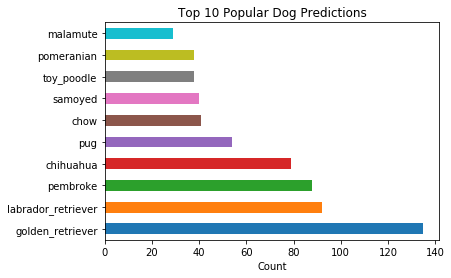

In [135]:
df_twitter.prediction.value_counts()[:10].plot(kind='barh', title='Top 10 Popular Dog Predictions')
plt.xlabel('Count')


Text(0.5, 0, 'Count')

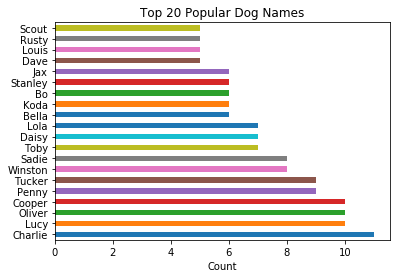

In [136]:
df_twitter.name.value_counts()[:20].plot(kind='barh', title='Top 20 Popular Dog Names')
plt.xlabel('Count')

Text(0.5, 0, 'Count')

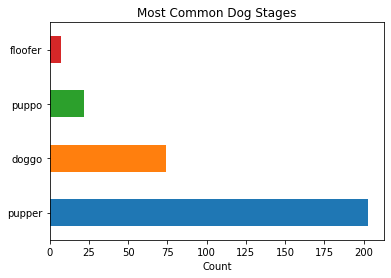

In [137]:
df_twitter.dog_stages.value_counts().plot(kind='barh', title='Most Common Dog Stages')
plt.xlabel('Count')

Text(0.5, 0, 'Count')

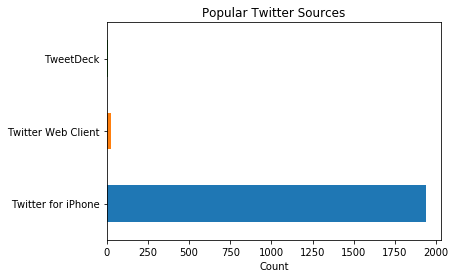

In [138]:
df_twitter.source.value_counts().plot(kind='barh', title='Popular Twitter Sources')
plt.xlabel('Count')

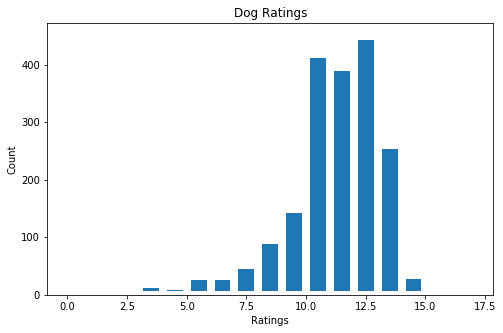

In [139]:
# Ratings
plt.figure(figsize = (8, 5))
plt.xlabel('Ratings')
plt.ylabel('Count')
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
plt.hist(x = df_twitter.rating_numerator, 
         edgecolor='white', linewidth=8, bins = bins)
plt.title('Dog Ratings');

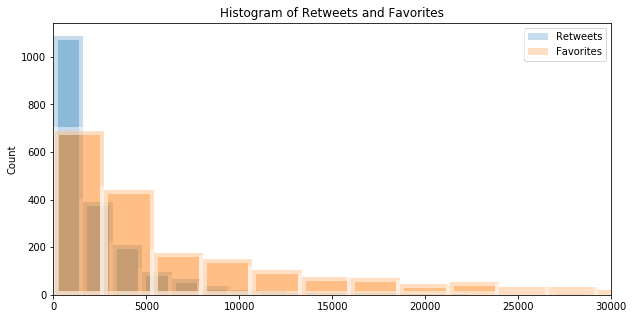

In [140]:
# Retweets
plt.figure(figsize = (10, 5))
plt.ylabel('Count')
plt.xlim(0, 30000)
plt.hist(x = df_twitter.retweet_count, edgecolor='white', label="Retweets", linewidth=8, bins = 50, alpha=.5,)
plt.hist(x = df_twitter.favorite_count, edgecolor='white', label="Favorites", linewidth=8, bins = 50, alpha=.5,)
plt.title('Histogram of Retweets and Favorites')
plt.legend();

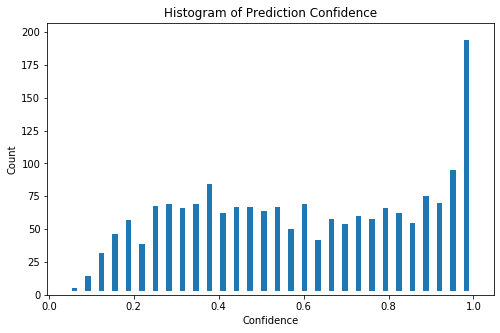

In [141]:
# Predictions
plt.figure(figsize = (8, 5))
plt.xlabel('Confidence')
plt.ylabel('Count')
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
plt.hist(x = df_twitter.confidence, 
         edgecolor='white', linewidth=8, bins = 30)
plt.title('Histogram of Prediction Confidence');